# Explore Tara

In [1]:
# imports
from importlib import reload
import numpy as np
import pandas
import datetime

from matplotlib import pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy

import seaborn as sns

from oceancolor.tara import io
from oceancolor.tara import spectra

In [2]:
tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

# Load the table

In [3]:
tara_db = io.load_tara_db()

In [4]:
tara_db.head()

,date,time,lat,lon,Wt,sal,ap405.5,ap410.1,ap414.4,ap419,...,sig_cp694.9,sig_cp707.8,sig_cp711,sig_cp714.2,sig_cp720.5,sig_cp723.2,sig_cp726,sig_cp728.8,sig_cp731.6,sig_cp734.5
0,20101127,00:48:00,-35.9020,-55.0559,19.9823,27.9347,0.0946,0.0945,0.0951,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20101127,00:49:00,-35.9039,-55.0557,19.9328,27.9828,0.0937,0.0942,0.0940,0.0935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20101127,00:50:00,-35.9057,-55.0555,19.9248,27.9704,0.0950,0.0946,0.0956,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20101127,00:51:00,-35.9076,-55.0552,19.9006,28.0009,0.0931,0.0939,0.0950,0.0937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20101127,00:52:00,-35.9095,-55.0550,19.8383,28.1017,0.0932,0.0928,0.0936,0.0924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Geographical plots

## 2010

In [5]:
in_2010 = (tara_db.datetime >= datetime.datetime(2010,1,1)) & (tara_db.datetime < datetime.datetime(2011,1,1))

In [6]:
tara_2010 = tara_db[in_2010]
tara_2010.head()

,date,time,lat,lon,Wt,sal,ap405.5,ap410.1,ap414.4,ap419,...,sig_cp694.9,sig_cp707.8,sig_cp711,sig_cp714.2,sig_cp720.5,sig_cp723.2,sig_cp726,sig_cp728.8,sig_cp731.6,sig_cp734.5
0,20101127,00:48:00,-35.9020,-55.0559,19.9823,27.9347,0.0946,0.0945,0.0951,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20101127,00:49:00,-35.9039,-55.0557,19.9328,27.9828,0.0937,0.0942,0.0940,0.0935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20101127,00:50:00,-35.9057,-55.0555,19.9248,27.9704,0.0950,0.0946,0.0956,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20101127,00:51:00,-35.9076,-55.0552,19.9006,28.0009,0.0931,0.0939,0.0950,0.0937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20101127,00:52:00,-35.9095,-55.0550,19.8383,28.1017,0.0932,0.0928,0.0936,0.0924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tara_2010.cruise

0             BA-Ushuaia
1             BA-Ushuaia
2             BA-Ushuaia
3             BA-Ushuaia
4             BA-Ushuaia
               ...      
302774    Male-StBrandon
302775    Male-StBrandon
302776    Male-StBrandon
302777    Male-StBrandon
302778    Male-StBrandon
Name: cruise, Length: 82370, dtype: object

### Plot by cruise

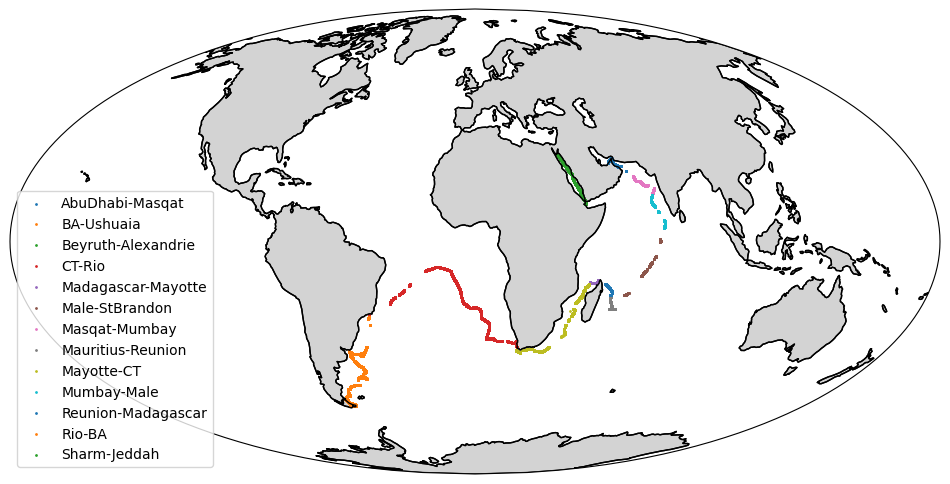

In [8]:
fig = plt.figure(figsize=(12,8))
plt.clf()

ax = plt.subplot(projection=tformM)

for cruise in np.unique(tara_2010.cruise):
    on_cruise = tara_2010.cruise == cruise
    img = plt.scatter(x=tara_2010[on_cruise].lon,
        y=tara_2010[on_cruise].lat,
        #c=hp_plot[good], 
        #cmap=cm,
        #vmin=0.,
        #vmax=vmax, 
        s=1,
        transform=tformP,
                     label=cruise)

# Coast lines
ax.coastlines(zorder=10)
ax.add_feature(cartopy.feature.LAND, 
    facecolor='lightgray', edgecolor='black')
ax.set_global()
ax.legend(loc='lower left')

plt.show()

## Salinity

In [9]:
tara_db.sal.min(), tara_db.sal.max()

(-9999.0, 40.3325)

In [10]:
gd_sal = tara_db.sal > 15.

In [11]:
np.sum(gd_sal)

286734

In [12]:
tara_db[gd_sal].lat.min()

-64.4072

In [13]:
tara_sal = tara_db[gd_sal]

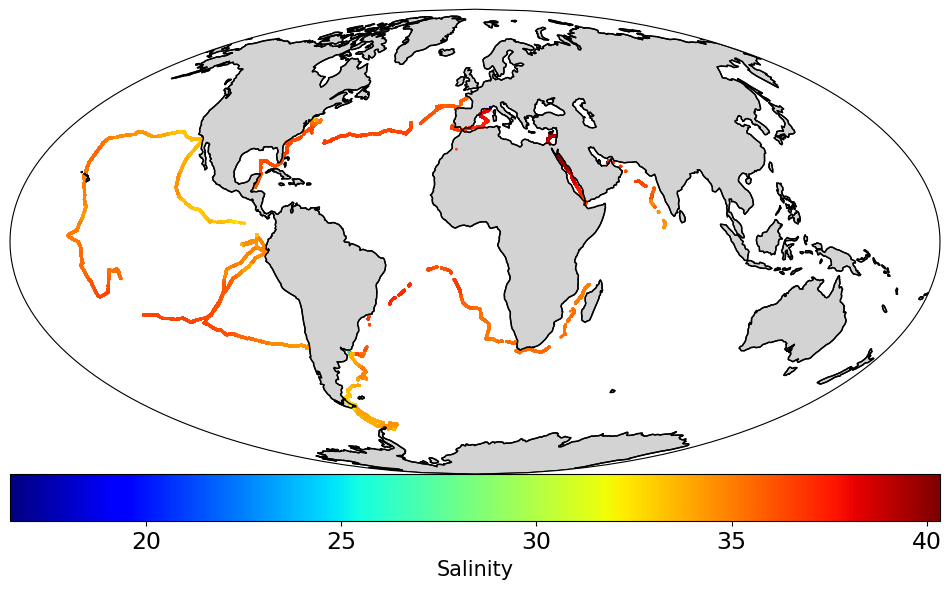

In [14]:
fig = plt.figure(figsize=(12,8))
plt.clf()

ax = plt.subplot(projection=tformM)

img = plt.scatter(
    x=tara_sal.lon,
    y=tara_sal.lat,
    c=tara_sal.sal, 
    cmap='jet',
    #vmin=0.,
    #vmax=vmax, 
    s=1,
    transform=tformP)

# Coast lines
ax.coastlines(zorder=10)
ax.add_feature(cartopy.feature.LAND, 
    facecolor='lightgray', edgecolor='black')
ax.set_global()
#ax.legend(loc='lower left')

# Colorbar
cb = plt.colorbar(img, orientation='horizontal', pad=0.)
lbl = 'Salinity'
cb.set_label(lbl, fontsize=15.)
cb.ax.tick_params(labelsize=17)


plt.show()

# Dist plots

In [15]:
reload(spectra)

<module 'oceancolor.tara.spectra' from '/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py'>

In [16]:
ap_675, sig_675 = spectra.single_value(tara_db, 675.)

In [17]:
tara_db['ap_675'] = ap_675

## $a_p(675)$ vs. Sal

In [18]:
tara_sal = tara_db[gd_sal]

<Figure size 1200x800 with 0 Axes>

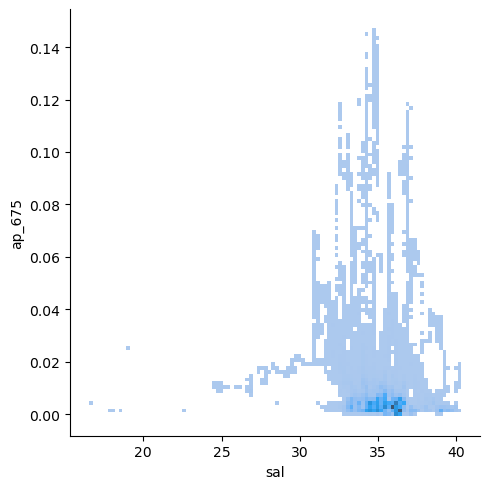

In [19]:
fig = plt.figure(figsize=(12,8))
plt.clf()

#ax = plt.gca()
sns.displot(tara_sal, x='sal', y='ap_675', kind='hist', bins=100)

plt.show()

# $a_p(675)$ vs. Lat

In [20]:
del tara_sal

In [21]:
del tara_2010

In [29]:
gd = np.isfinite(tara_db.lat) & (tara_db['ap_675'] > 0)
#tara_gd = tara_db[gd]

In [30]:
tara_gd = tara_db[['lat', 'ap_675']][gd]

In [31]:
tara_gd.ap_675.min()

3.3333333333333335e-05

<Figure size 1200x800 with 0 Axes>

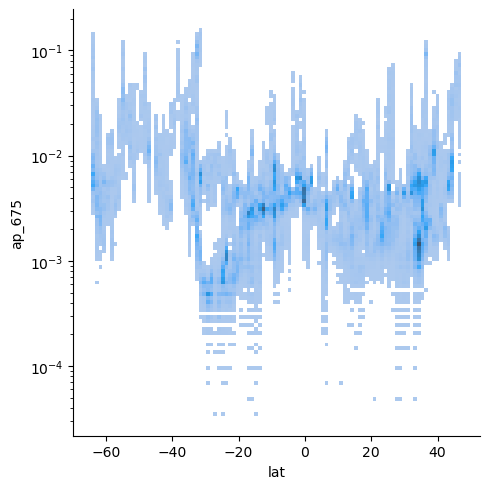

In [32]:
fig = plt.figure(figsize=(12,8))
plt.clf()

#ax = plt.gca()
sns.displot(tara_gd, x='lat', y='ap_675', kind='hist', bins=100,
           log_scale=(False, True))

plt.show()